# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-11-16 19:00:03.571342


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/15/20


,11/15/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,11036935,246214,2.23
Brazil,5863093,165798,2.83
India,8845127,130070,1.47
Mexico,1006522,98542,9.79
United Kingdom,1372884,52026,3.79
Italy,1178529,45229,3.84
France,2031472,44613,2.20


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 11/15/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
52322,US,10737335,2020-11-13,244332.0,1138.0,177224.0,139960.428571
52321,US,10560111,2020-11-12,243194.0,1217.0,160786.0,132486.714286
52320,US,10399325,2020-11-11,241977.0,1388.0,143231.0,127474.428571
52319,US,10256094,2020-11-10,240589.0,1400.0,140290.0,121719.428571
52318,US,10115804,2020-11-09,239189.0,698.0,119944.0,119257.428571
52317,US,9995860,2020-11-08,238491.0,473.0,109780.0,113819.714286
52316,US,9886080,2020-11-07,238018.0,1013.0,128468.0,109059.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/15/20


,11/15/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,560200,34032.0,6.07
Texas,1059753,20002.0,1.89
California,1032095,18262.0,1.77
Florida,885201,17518.0,1.98
New Jersey,279274,16566.0,5.93
Illinois,573616,11162.0,1.95
Massachusetts,188275,10329.0,5.49


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 11/15/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1791,California,1013566,2020-11-13,18205.0,70.0,9450.0,7193.571429
1790,California,1004116,2020-11-12,18135.0,27.0,8541.0,6751.714286
1789,California,995575,2020-11-11,18108.0,42.0,6143.0,6379.285714
1788,California,989432,2020-11-10,18066.0,45.0,8135.0,6290.142857
1787,California,981297,2020-11-09,18021.0,48.0,8584.0,5840.857143
1786,California,972713,2020-11-08,17973.0,12.0,3351.0,5262.142857
1785,California,969362,2020-11-07,17961.0,30.0,6151.0,5317.000000


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 11/15/20


,11/15/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,339560,7269.0,2.14
Orange,65225,1526.0,2.34
Riverside,74910,1367.0,1.82
San Bernardino,74166,1097.0,1.48
San Diego,64768,926.0,1.43
Sacramento,30298,520.0,1.72
San Joaquin,23517,501.0,2.13


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 11/15/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5678,Los Angeles,332865,2020-11-13,7246.0,25.0,2415.0,2172.714286
5677,Los Angeles,330450,2020-11-12,7221.0,5.0,2486.0,2126.571429
5676,Los Angeles,327964,2020-11-11,7216.0,16.0,2088.0,2062.571429
5675,Los Angeles,325876,2020-11-10,7200.0,23.0,2251.0,2018.714286
5674,Los Angeles,323625,2020-11-09,7177.0,7.0,3648.0,1861.428571
5673,Los Angeles,319977,2020-11-08,7170.0,0.0,0.0,1541.000000
5672,Los Angeles,319977,2020-11-07,7170.0,13.0,2321.0,1765.571429
5671,Los Angeles,317656,2020-11-06,7157.0,17.0,2092.0,1618.428571
5670,Los Angeles,315564,2020-11-05,7140.0,23.0,2038.0,1499.142857
5669,Los Angeles,313526,2020-11-04,7117.0,20.0,1781.0,1451.000000



7 day new US cases as of 11/15/20


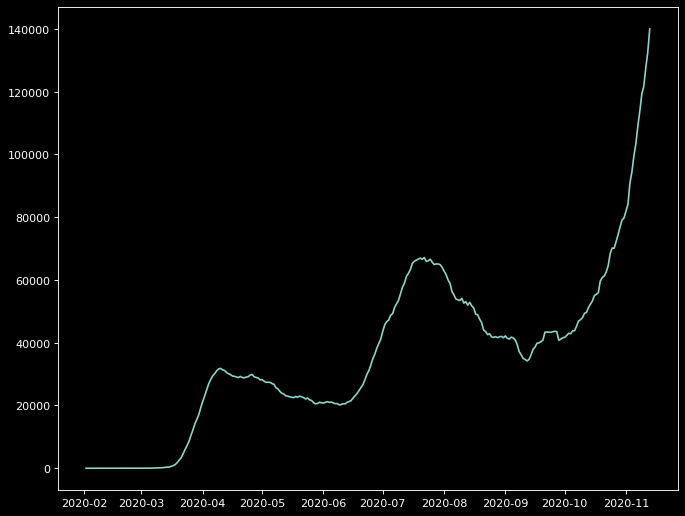

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 11/15/20


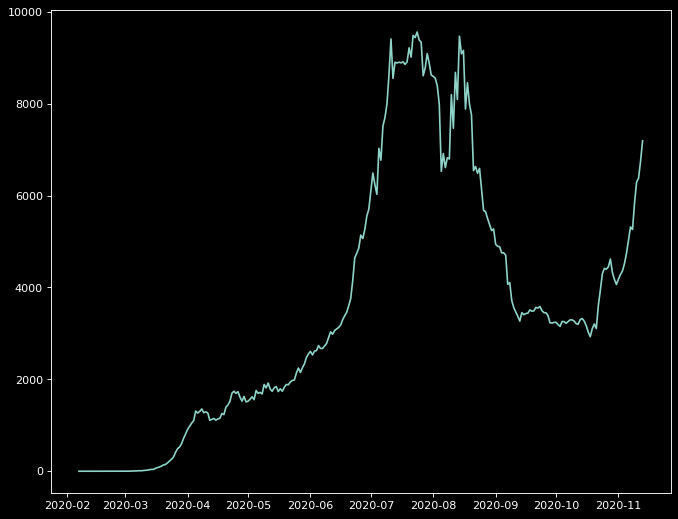

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 11/15/20


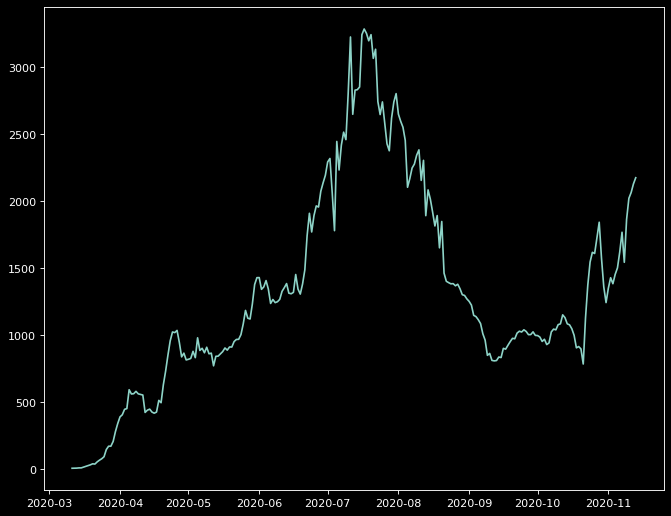

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()